In [1]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

0.0 1024.0


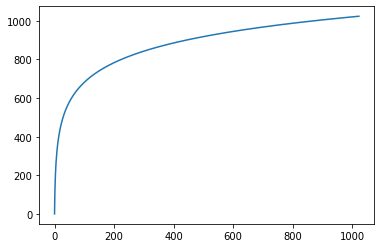

In [2]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0,1024)
#print(x)
y = np.log10(1+ x)
y = (y/y.max())*1024
print(y[0], y[-1])
plt.plot(x,y)

0.0 22028.466796875


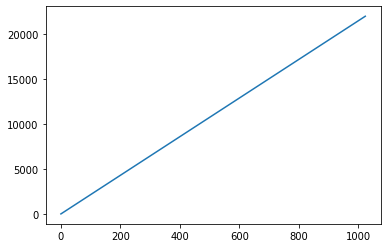

In [3]:
import numpy as np
import matplotlib.pyplot as plt
sr = 44100
fft_size = 2048
x = np.arange(0,1024)

#print(x)
f = x*sr/fft_size
#y = (y/y.max())*1024
print(f[0], f[-1])
plt.plot(x,f)

0.0 4291.511434875646


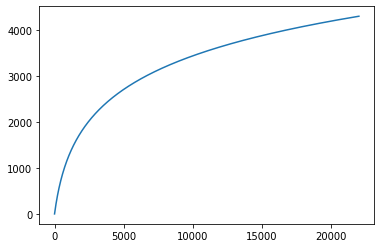

In [4]:
# 32 1/sec

#print(x)
y = 2595*np.log10(1+ f/500)
#y = (y/y.max())*1024
print(y[0], y[-1])
plt.plot(f,y)

In [6]:
pourquoi_file = "DataSet/pourquoi/0000.wav"
ipd.Audio(pourquoi_file)

In [72]:
pourquoi_file = "DataSet/pourquoi/0008.wav"
ipd.Audio(pourquoi_1_file)

In [73]:
capitaine_file = "DataSet/capitaine/0000.wav"
ipd.Audio(capitaine_file)

# Spectogram logaritmic

In [80]:
FRAME_SIZE = 4096#2048
HOP_SIZE = 128# 1024
SAMPLE_RATE = 44100#22050

def load_scaled(file_path):
    signal, sr = librosa.load(file_path, SAMPLE_RATE)
    signal_sfft = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    print(signal_sfft.shape)
    signal_sfft_abs = np.abs(signal_sfft) ** 2
    signal_sftt_scaled = librosa.power_to_db(signal_sfft_abs)
    return signal_sftt_scaled, sr

In [81]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"): # linear, log
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis,
                            cmap='jet')
    plt.colorbar(format="%+2.f")

(2049, 192)


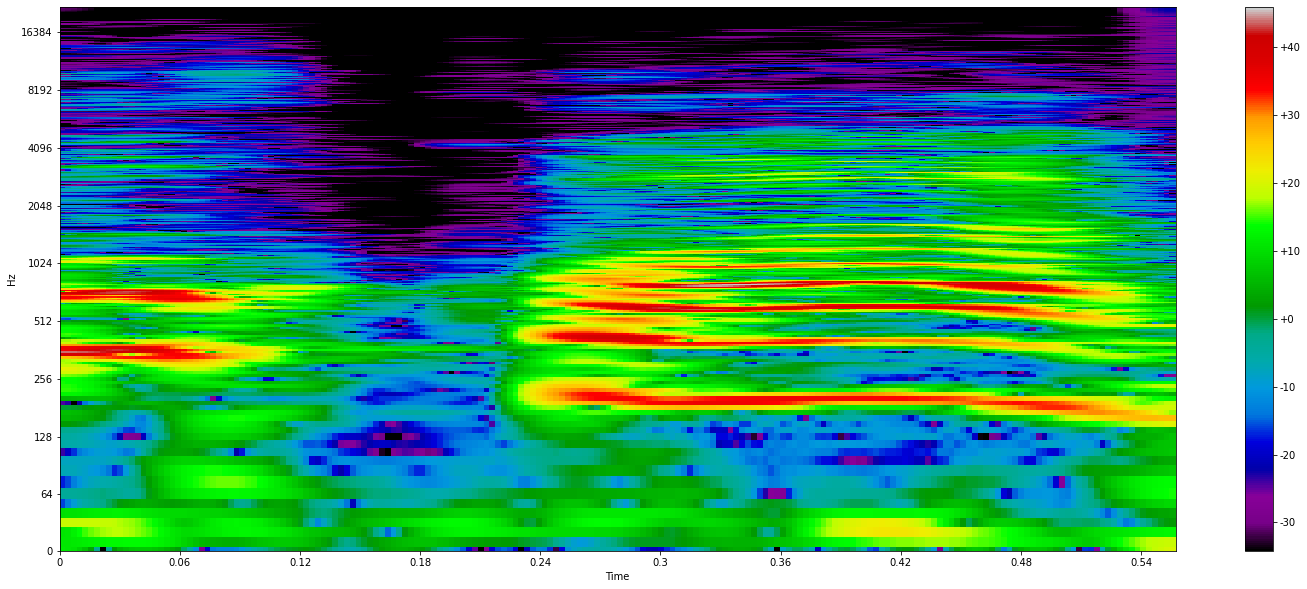

In [82]:
pourquoi_spec, _ =  load_scaled(pourquoi_file)

fig = plt.figure(figsize=(25, 10))

librosa.display.specshow(pourquoi_spec, sr=SAMPLE_RATE, hop_length=HOP_SIZE,
                         x_axis="time", y_axis="log", cmap='nipy_spectral')

plt.colorbar(format="%+2.f")

In [10]:
pourquoi_spec, _ =  load_scaled(pourquoi_file)
pourquoi_spec1, _ =  load_scaled(pourquoi_1_file)
capitaine_spec, _ =  load_scaled(capitaine_file)


(1025, 17)
(1025, 12)
(1025, 40)


/home/oscar/Mastering/audio_project/spectogram/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/oscar/Mastering/audio_project/spectogram/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/home/oscar/Mastering/audio_project/spectogram/venv/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


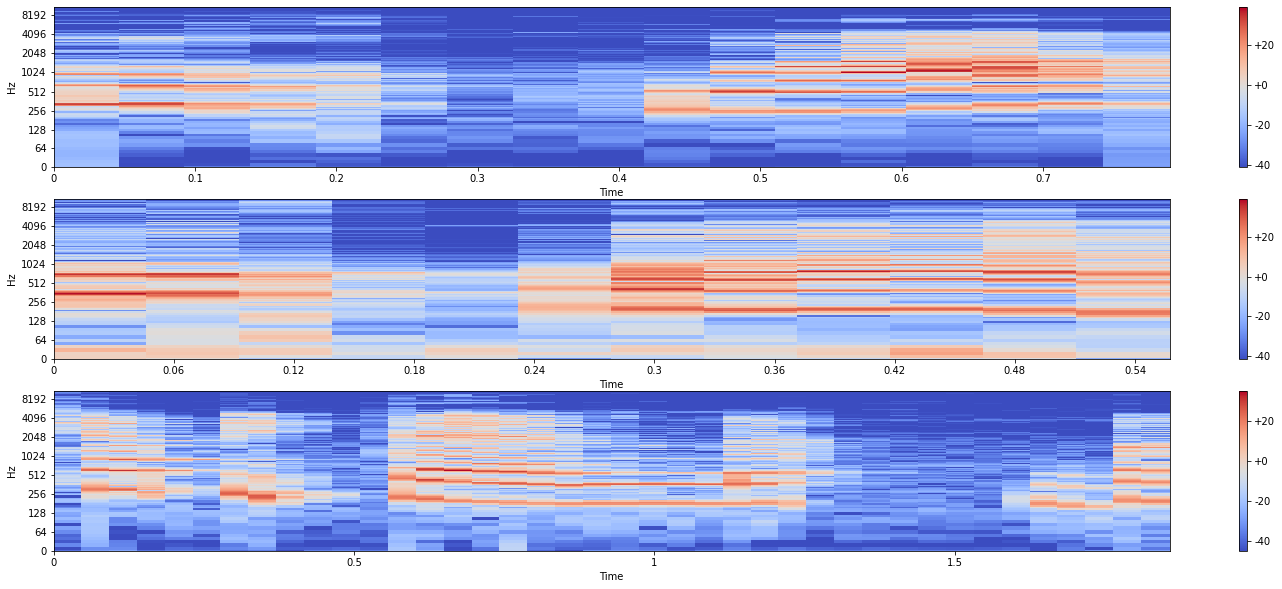

In [11]:
plt.figure(figsize=(25, 10))

plt.subplot(3,1,1)
librosa.display.specshow(pourquoi_spec, sr=SAMPLE_RATE, hop_length=HOP_SIZE, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f")

plt.subplot(3,1,2)
librosa.display.specshow(pourquoi_spec1, sr=SAMPLE_RATE, hop_length=HOP_SIZE, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f")

plt.subplot(3,1,3)
librosa.display.specshow(capitaine_spec, sr=SAMPLE_RATE, hop_length=HOP_SIZE, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.f")


# MFCCs

In [12]:
def get_mfccs(file_path):
    signal, sr = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    print(mfccs.shape)
    return mfccs

(13, 33)
(13, 24)
(13, 80)


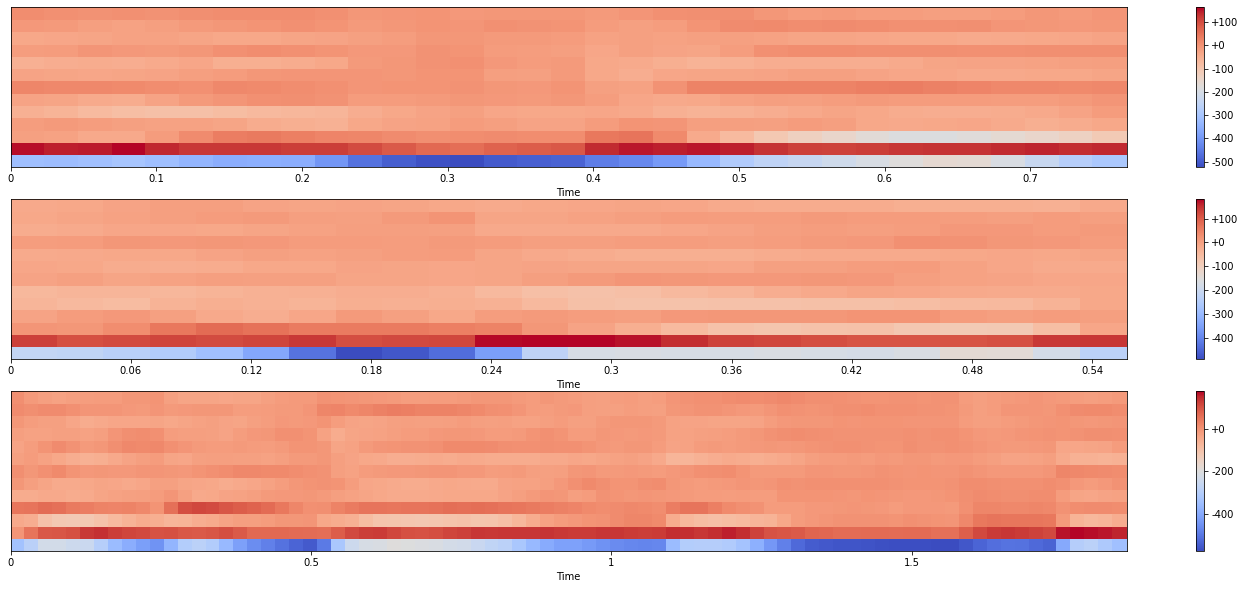

In [13]:
plt.figure(figsize=(25, 10))

plt.subplot(3,1,1)
librosa.display.specshow(get_mfccs(pourquoi_file), x_axis="time", sr=SAMPLE_RATE)
plt.colorbar(format="%+2.f")

plt.subplot(3,1,2)
librosa.display.specshow(get_mfccs(pourquoi_1_file), x_axis="time", sr=SAMPLE_RATE)
plt.colorbar(format="%+2.f")

plt.subplot(3,1,3)
librosa.display.specshow(get_mfccs(capitaine_file), x_axis="time", sr=SAMPLE_RATE)
plt.colorbar(format="%+2.f")


plt.show()